Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85      1036
           1       0.59      0.58      0.58       373

    accuracy                           0.78      1409
   macro avg       0.72      0.72      0.72      1409
weighted avg       0.78      0.78      0.78      1409

KNN Report:
               precision    recall  f1-score   support

           0       0.74      1.00      0.85      1036
           1       0.33      0.01      0.01       373

    accuracy                           0.73      1409
   macro avg       0.53      0.50      0.43      1409
weighted avg       0.63      0.73      0.63      1409



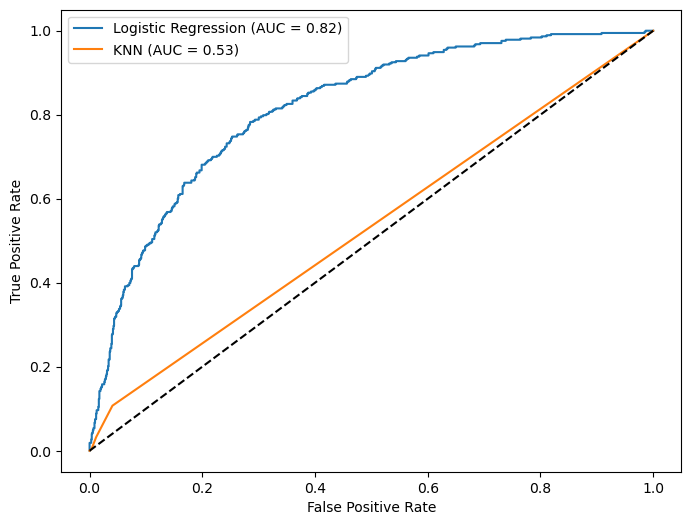

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

df = pd.read_csv("D:\\churn\\WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.drop(columns=['customerID'], inplace=True)

for col in df.select_dtypes(include=['object']).columns:
    if df[col].nunique() == 2:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
    else:
        df = pd.get_dummies(df, columns=[col], drop_first=True)

y = df['Churn']
X = df.drop(columns=['Churn'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print("Logistic Regression Report:\n", classification_report(y_test, y_pred_log))
print("KNN Report:\n", classification_report(y_test, y_pred_knn))

log_fpr, log_tpr, _ = roc_curve(y_test, log_reg.predict_proba(X_test)[:,1])
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
log_auc = auc(log_fpr, log_tpr)
knn_auc = auc(knn_fpr, knn_tpr)

plt.figure(figsize=(8,6))
plt.plot(log_fpr, log_tpr, label=f'Logistic Regression (AUC = {log_auc:.2f})')
plt.plot(knn_fpr, knn_tpr, label=f'KNN (AUC = {knn_auc:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()